In [3]:
import pandas as pd
import numpy as np
#import altair as alt
#import seaborn as sns
import matplotlib.pyplot as plt
import re

In [5]:
pwd

'/Users/camilletran/Documents/DSC106/final_project'

In [7]:
df = pd.read_csv('final_project/exoplanet.csv')
df.columns

Index(['system_id', 'pl_name', 'hostname', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj',
       'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse',
       'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj',
       'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype',
       'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad',
       'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1',
       'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', '

In [13]:

df['system_id'].unique().tolist()

['11 Com',
 '11 UMi',
 '14 And',
 '14 Her',
 '16 Cyg',
 '17 Sco',
 '18 Del',
 '1RXS J160929.1-210524',
 '24 Boo',
 '24 Sex',
 '2MASS J04372171+2651014',
 '2MASS J01033563-5515561',
 '2MASS J01225093-2439505',
 '2MASS J02192210-3925225',
 '2MASS J0249-0557',
 '2MASS J03590986+2009361',
 '2MASS J04414489+2301513',
 '2MASS J11011926-7732383',
 '2MASS J11550485-7919108',
 '2MASS J12073346-3932539',
 '2MASS J19383260+4603591',
 '2MASS J21252752-8138278',
 '2MASS J22362452+4751425',
 '30 Ari',
 '4 UMa',
 '42 Dra',
 '47 UMa',
 '51 Eri',
 '51 Peg',
 '55 Cnc',
 '6 Lyn',
 '61 Vir',
 '7 CMa',
 '70 Vir',
 '75 Cet',
 '8 UMi',
 '81 Cet',
 '91 Aqr',
 'AB Aur',
 'AB Pic',
 'AF Lep',
 'AT2021ueyL',
 'AU Mic',
 'BD+03 2562',
 'BD+05 4868',
 'BD+14 4559',
 'BD+15 2375',
 'BD+15 2940',
 'BD+20 2457',
 'BD+20 274',
 'BD+20 594',
 'BD+45 564',
 'BD+48 738',
 'BD+48 740',
 'BD+49 828',
 'BD+55 362',
 'BD+60 1417',
 'BD+63 1405',
 'BD-06 1339',
 'BD-08 2823',
 'BD-10 3166',
 'BD-11 4672',
 'BD-13 2130',
 'BD-

In [3]:
#Create the system_name column
def extract_system_name(hostname):
    # Remove any star component (like A, B, AB, etc.) from the hostname
    return re.sub(r'\s+[A-Z]+$', '', hostname)

df['system_id'] = df['hostname'].apply(extract_system_name)

#Rearrange columns to move system_id to the front
all_columns = df.columns.tolist()
all_columns.remove('system_name')
new_column_order = ['system_id', 'pl_name', 'hostname'] + [col for col in all_columns if col not in ['pl_name', 'hostname']]
df = df[new_column_order]

In [4]:
df.head()

,system_id,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,...,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,system_id
0,11 Com,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,...,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,11 Com
1,11 UMi,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,...,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,11 UMi
2,14 And,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,...,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,14 And
3,14 Her,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,...,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,14 Her
4,16 Cyg,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,...,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603,16 Cyg


In [112]:
exoplanets = pd.read_csv('exoplanet.csv')

In [113]:
import pandas as pd
import re

# Assuming your dataframe is called 'exoplanets'
# First, create a function to extract the star component from planet names

def extract_star_component(pl_name, hostname):
    # If hostname already includes a component (like "Kepler-16 A")
    if re.search(r'\s[A-Z]$', hostname):
        return hostname
    
    # For cases where pl_name might specify which star (rare but possible)
    # For example "Kepler-16 A b" would orbit star A in the Kepler-16 system
    match = re.search(r'(.*)\s([A-Z])\s([a-z])$', pl_name)
    if match:
        system, star, planet = match.groups()
        return f"{hostname} {star}"
    
    # Default case: planet orbits the primary star or the entire system
    return hostname

# Create new column for specific star being orbited
exoplanets['orbited_star'] = exoplanets.apply(
    lambda row: extract_star_component(row['pl_name'], row['hostname']), axis=1)

# Create a system_id column to group planets in the same stellar system
exoplanets['system_id'] = exoplanets['hostname'].str.replace(r'\s[A-Z]$', '', regex=True)

# Add a column that shows the star configuration
exoplanets['star_config'] = exoplanets.apply(
    lambda row: f"Binary/Multiple ({row['sy_snum']} stars)" if row['sy_snum'] > 1 
    else "Single star", axis=1)

# Create a column for planet order within its system (based on letter)
def extract_planet_letter(pl_name):
    # Extract the letter(s) at the end of planet name
    match = re.search(r'\s([a-z]+)$', pl_name)
    return match.group(1) if match else ''

exoplanets['planet_letter'] = exoplanets['pl_name'].apply(extract_planet_letter)

# Calculate companion stars when applicable
def get_companion_stars(hostname, system_id, sy_snum):
    if sy_snum <= 1:
        return "None"
    
    # If hostname has a specific star designation
    match = re.search(r'(.*)\s([A-Z])$', hostname)
    if match and sy_snum > 1:
        system, star = match.groups()
        # Create list of possible companions based on sy_snum
        all_stars = [chr(65 + i) for i in range(min(sy_snum, 26))]  # A, B, C, etc.
        companions = [s for s in all_stars if s != star]
        return ", ".join([f"{system} {s}" for s in companions])
    
    return "Unspecified companions"

exoplanets['companion_stars'] = exoplanets.apply(
    lambda row: get_companion_stars(row['hostname'], row['system_id'], row['sy_snum']), axis=1)

In [115]:
# Group by system and show the star configuration
system_summary = exoplanets.groupby(['system_id']).agg({
    'pl_name': list,
    'hostname': pd.Series.nunique,
    'sy_snum': 'first',
    'sy_pnum': 'first',
    'orbited_star': list,
    'companion_stars': 'first'
}).rename(columns={
    'pl_name': 'planets',
    'hostname': 'unique_host_names',
    'sy_snum': 'star_count',
    'sy_pnum': 'planet_count',
    'orbited_star': 'orbited_stars'
})

# Filter to show just multi-star systems
multi_star_systems = system_summary[system_summary['star_count'] > 1]

system_summary

,planets,unique_host_names,star_count,planet_count,orbited_stars,companion_stars
system_id,,,,,,
11 Com,[11 Com b],1,2,1,[11 Com],Unspecified companions
11 UMi,[11 UMi b],1,1,1,[11 UMi],None
14 And,[14 And b],1,1,1,[14 And],None
14 Her,"[14 Her b, HD 145675 c]",1,1,2,"[14 Her, 14 Her]",None
16 Cyg,[16 Cyg B b],1,3,1,[16 Cyg B],"16 Cyg A, 16 Cyg C"
...,...,...,...,...,...,...
tau Cet,"[tau Cet e, tau Cet f, tau Cet g, tau Cet h]",1,1,4,"[tau Cet, tau Cet, tau Cet, tau Cet]",None
tau Gem,[tau Gem b],1,1,1,[tau Gem],None
ups And,"[ups And b, ups And c, ups And d]",1,2,3,"[ups And, ups And, ups And]",Unspecified companions


In [117]:
#shows which planets by which star they are orbiting 
star_a_planets = exoplanets[exoplanets['orbited_star'].str.endswith(' A')]

star_a_planets

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,orbited_star,system_id,star_config,planet_letter,companion_stars
12,2MASS J01033563-5515561 AB b,2MASS J01033563-5515561 A,2,1,Imaging,2013,Paranal Observatory,0,NaN,NaN,...,0.022,-0.022,NaN,NaN,NaN,2MASS J01033563-5515561 A,2MASS J01033563-5515561,Binary/Multiple (2 stars),b,2MASS J01033563-5515561 B
15,2MASS J0249-0557 c,2MASS J0249-0557 A,2,1,Imaging,2018,Mauna Kea Observatory,0,NaN,NaN,...,0.021,-0.021,15.68940,0.001224,-0.001224,2MASS J0249-0557 A,2MASS J0249-0557,Binary/Multiple (2 stars),c,2MASS J0249-0557 B
57,BD+05 4868 A b,BD+05 4868 A,2,1,Transit,2025,Transiting Exoplanet Survey Satellite (TESS),0,1.271869e+00,0.000001,...,0.026,-0.026,9.84152,0.000476,-0.000476,BD+05 4868 A,BD+05 4868,Binary/Multiple (2 stars),b,BD+05 4868 B
80,BD-14 3065 b,BD-14 3065 A,3,1,Transit,2024,Transiting Exoplanet Survey Satellite (TESS),0,4.288973e+00,0.000005,...,0.026,-0.026,10.91000,0.001617,-0.001617,BD-14 3065 A,BD-14 3065,Binary/Multiple (3 stars),b,"BD-14 3065 B, BD-14 3065 C"
90,CFHTWIR-Oph 98 b,CFHTWIR-Oph 98 A,1,1,Imaging,2021,Hubble Space Telescope,0,8.040000e+06,470000.000000,...,0.098,-0.098,NaN,NaN,NaN,CFHTWIR-Oph 98 A,CFHTWIR-Oph 98,Single star,b,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5821,WASP-94 A b,WASP-94 A,2,2,Transit,2014,SuperWASP,0,3.950190e+00,0.000004,...,0.024,-0.024,10.02850,0.000365,-0.000365,WASP-94 A,WASP-94,Binary/Multiple (2 stars),b,WASP-94 B
5831,WISEP J121756.91+162640.2 A b,WISEP J121756.91+162640.2 A,1,1,Imaging,2012,W. M. Keck Observatory,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,WISEP J121756.91+162640.2 A,WISEP J121756.91+162640.2,Single star,b,None
5859,b Cen AB b,b Cen A,2,1,Imaging,2021,Paranal Observatory,0,1.790000e+06,830000.000000,...,0.026,-0.026,4.01093,0.008918,-0.008918,b Cen A,b Cen,Binary/Multiple (2 stars),b,b Cen B
5866,eps Ind A b,eps Ind A,3,1,Radial Velocity,2019,La Silla Observatory,0,1.651000e+04,2100.000000,...,0.240,-0.240,4.34562,0.007374,-0.007374,eps Ind A,eps Ind,Binary/Multiple (3 stars),b,"eps Ind B, eps Ind C"


In [116]:
multi_star_systems

,planets,unique_host_names,star_count,planet_count,orbited_stars,companion_stars
system_id,,,,,,
11 Com,[11 Com b],1,2,1,[11 Com],Unspecified companions
16 Cyg,[16 Cyg B b],1,3,1,[16 Cyg B],"16 Cyg A, 16 Cyg C"
18 Del,[18 Del b],1,2,1,[18 Del],Unspecified companions
2MASS J01033563-5515561,[2MASS J01033563-5515561 AB b],1,2,1,[2MASS J01033563-5515561 A],2MASS J01033563-5515561 B
2MASS J0249-0557,[2MASS J0249-0557 c],1,2,1,[2MASS J0249-0557 A],2MASS J0249-0557 B
...,...,...,...,...,...,...
ome Ser,[ome Ser b],1,2,1,[ome Ser],Unspecified companions
omi UMa,[omi UMa b],1,2,1,[omi UMa],Unspecified companions
psi1 Dra,[psi1 Dra B b],1,3,1,[psi1 Dra B],"psi1 Dra A, psi1 Dra C"


In [111]:
df['hostname'].unique()

array(['11 Com', '11 UMi', '14 And', ..., 'ups And', 'ups Leo', 'xi Aql'],
      shape=(4409,), dtype=object)

In [103]:
df['system_summary'] = (
    "System '" + df['hostname'] + "' has " +
    df['sy_snum'].astype(str) + " star(s) and " +
    df['sy_pnum'].astype(str) + " known planet(s)."
)

In [ ]:
df['planet_summary'] = (
    df['pl_name'] + " orbits host '" + df['hostname'] + 
    "' in a system with " + df['sy_snum'].astype(str) + " star(s)."
)

In [109]:
df['multi_star_flag'] = df['sy_snum'] > 1

In [5]:
display_cols = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 
                'multi_star_flag', 'host_component', 
                'system_summary', 'planet_summary']

print(df[display_cols].head(10))

KeyError: "['multi_star_flag', 'host_component', 'system_summary', 'planet_summary'] not in index"

In [ ]:
import re

def get_star_component(name):
    match = re.search(r'\b([A-Z]{1,2})\b', name.split()[-1])
    return match.group(1) if match else "Unknown"

df['host_component'] = df['hostname'].apply(get_star_component)

In [102]:
df.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [95]:
df[df['sy_snum'] > 1][['pl_name', 'hostname', 'sy_snum']]


,pl_name,hostname,sy_snum
0,11 Com b,11 Com,2
4,16 Cyg B b,16 Cyg B,3
6,18 Del b,18 Del,2
12,2MASS J01033563-5515561 AB b,2MASS J01033563-5515561 A,2
15,2MASS J0249-0557 c,2MASS J0249-0557 A,2
...,...,...,...
5887,psi1 Dra B b,psi1 Dra B,3
5892,tau Boo b,tau Boo,2
5898,ups And b,ups And,2
5899,ups And c,ups And,2


In [96]:
import re

# Extract star component from the hostname
def get_star_component(name):
    match = re.search(r'\b([A-Z]{1,2})\b', name.split()[-1])
    return match.group(1) if match else "Unknown"

df['star_component'] = df['hostname'].apply(get_star_component)


In [97]:
multi_star_df = df[df['sy_snum'] > 1].copy()
multi_star_df['star_component'] = multi_star_df['hostname'].apply(get_star_component)


In [98]:
print(multi_star_df[['pl_name', 'hostname', 'star_component']].head(10))

# Count how many planets orbit each component
print("\nNumber of planets by host star component:")
print(multi_star_df['star_component'].value_counts())

                         pl_name                   hostname star_component
0                       11 Com b                     11 Com        Unknown
4                     16 Cyg B b                   16 Cyg B              B
6                       18 Del b                     18 Del        Unknown
12  2MASS J01033563-5515561 AB b  2MASS J01033563-5515561 A              A
15            2MASS J0249-0557 c         2MASS J0249-0557 A              A
21     2MASS J19383260+4603591 b    2MASS J19383260+4603591        Unknown
24                    30 Ari B b                   30 Ari B              B
26                      42 Dra b                     42 Dra        Unknown
30                      51 Eri b                     51 Eri        Unknown
32                      55 Cnc b                     55 Cnc        Unknown

Number of planets by host star component:
star_component
Unknown    413
A           84
P           19
B           13
C            6
AB           3
S            2
N           

In [99]:
# Get system name by stripping component suffix
multi_star_df['system_base'] = multi_star_df['hostname'].str.extract(r'^(.*?)[\s\-]?[A-Z]{1,2}$')[0].fillna(multi_star_df['hostname'])

# Group by system and list unique components
components_per_system = multi_star_df.groupby('system_base')['star_component'].unique()

# Show systems with more than one component with planets
print("\nMulti-star systems with planets around multiple components:")
for system, components in components_per_system.items():
    if len(components) > 1:
        print(f"{system}: {', '.join(components)}")



Multi-star systems with planets around multiple components:
HD 133131: A, B
HD 41004: A, B
WASP-94: A, B
XO-2: N, S


In [ ]:
HD 133131 A b,HD 133131 A
HD 133131 A c,HD 133131 A
HD 133131 B b,HD 133131 B

In [90]:
df.columns

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 

In [91]:
# Filter systems with more than one star
multi_star_systems_df = df[df['sy_snum'] > 1][['hostname', 'sy_snum']].drop_duplicates()

print("Multi-star systems (more than one host star):")
print(multi_star_systems_df.sort_values('sy_snum', ascending=False))

Multi-star systems (more than one host star):
      hostname  sy_snum
5028       PH1        4
24    30 Ari B        4
1003   HD 2638        3
1239  HD 87646        3
325   GJ 900 A        3
...        ...      ...
1213  HD 80606        2
1212  HD 79498        2
1198  HD 75289        2
1195   HD 7449        2
5898   ups And        2

[402 rows x 2 columns]


In [93]:
# Filter only multi-star systems
multi_star_planets = df[df['sy_snum'] > 1][['hostname', 'pl_name', 'sy_snum']]

# Sort for easier reading
multi_star_planets_sorted = multi_star_planets.sort_values(by=['hostname', 'pl_name'])

# Display the results
print("Planets in multi-star systems:")
print(multi_star_planets_sorted)


Planets in multi-star systems:
                       hostname                       pl_name  sy_snum
0                        11 Com                      11 Com b        2
4                      16 Cyg B                    16 Cyg B b        3
6                        18 Del                      18 Del b        2
12    2MASS J01033563-5515561 A  2MASS J01033563-5515561 AB b        2
15           2MASS J0249-0557 A            2MASS J0249-0557 c        2
...                         ...                           ...      ...
5887                 psi1 Dra B                  psi1 Dra B b        3
5892                    tau Boo                     tau Boo b        2
5898                    ups And                     ups And b        2
5899                    ups And                     ups And c        2
5900                    ups And                     ups And d        2

[541 rows x 3 columns]


In [94]:
# Group and display planets per multi-star system
grouped = multi_star_planets_sorted.groupby('hostname')['pl_name'].apply(list)

# Print system by system
for host, planets in grouped.items():
    print(f"{host} ({len(planets)} planets): {', '.join(planets)}")


11 Com (1 planets): 11 Com b
16 Cyg B (1 planets): 16 Cyg B b
18 Del (1 planets): 18 Del b
2MASS J01033563-5515561 A (1 planets): 2MASS J01033563-5515561 AB b
2MASS J0249-0557 A (1 planets): 2MASS J0249-0557 c
2MASS J19383260+4603591 (3 planets): 2MASS J19383260+4603591 b, Kepler-451 c, Kepler-451 d
30 Ari B (1 planets): 30 Ari B b
42 Dra (1 planets): 42 Dra b
51 Eri (1 planets): 51 Eri b
55 Cnc (5 planets): 55 Cnc b, 55 Cnc c, 55 Cnc d, 55 Cnc e, 55 Cnc f
75 Cet (2 planets): 75 Cet b, 75 Cet c
91 Aqr (1 planets): 91 Aqr b
BD+05 4868 A (1 planets): BD+05 4868 A b
BD-14 3065 A (1 planets): BD-14 3065 b
CoRoT-2 (1 planets): CoRoT-2 b
CoRoT-9 (1 planets): CoRoT-9 b
DE CVn (1 planets): DE CVn b
DMPP-3 A (1 planets): DMPP-3 A b
DP Leo (1 planets): DP Leo b
DS Tuc A (1 planets): DS Tuc A b
EPIC 246851721 (1 planets): EPIC 246851721 b
GJ 15 A (2 planets): GJ 15 A b, GJ 15 A c
GJ 229 (2 planets): GJ 229 A c, GJ 229 b
GJ 3021 (1 planets): GJ 3021 b
GJ 3222 (1 planets): GJ 3222 b
GJ 338 B (1 pla

In [92]:
multi_star_systems_count = df[df['sy_snum'] > 1]['hostname'].nunique()
print(f"Number of unique multi-star systems: {multi_star_systems_count}")

Number of unique multi-star systems: 402


In [89]:
print("Distribution of systems by number of stars:")
print(df[['hostname', 'sy_snum']].drop_duplicates()['sy_snum'].value_counts().sort_index())

Distribution of systems by number of stars:
sy_snum
1    4007
2     352
3      48
4       2
Name: count, dtype: int64


In [58]:
# Count planets per system
planets_per_system = df['hostname'].value_counts()

# Number of systems with different planet counts
system_planets_distribution = planets_per_system.value_counts().sort_index()
print("Distribution of planets per system:")
print(system_planets_distribution)

# Get some examples of rich multi-planet systems
rich_systems = planets_per_system[planets_per_system >= 5].sort_values(ascending=False)
print("\nSystems with 5+ planets:")
print(rich_systems)

Distribution of planets per system:
count
1    3421
2     659
3     209
4      79
5      28
6      11
7       1
8       1
Name: count, dtype: int64

Systems with 5+ planets:
hostname
KOI-351       8
TRAPPIST-1    7
HD 191939     6
HD 10180      6
K2-138        6
HD 219134     6
HD 110067     6
TOI-178       6
TOI-1136      6
Kepler-80     6
HD 34445      6
Kepler-20     6
Kepler-11     6
Kepler-238    5
K2-268        5
Kepler-32     5
Kepler-169    5
K2-384        5
Kepler-84     5
Kepler-139    5
HD 40307      5
HD 23472      5
Kepler-444    5
Kepler-102    5
Kepler-296    5
Kepler-150    5
Kepler-186    5
Kepler-154    5
55 Cnc        5
HD 134606     5
HD 158259     5
HIP 41378     5
Kepler-55     5
Kepler-82     5
GJ 667 C      5
Kepler-33     5
HD 108236     5
Kepler-48     5
Kepler-122    5
Kepler-292    5
Kepler-62     5
Name: count, dtype: int64


In [79]:
# Unique number of stars per system
if 'sy_snum' in df.columns:
    print(df[['hostname', 'sy_snum']].drop_duplicates().value_counts().sort_index())

hostname  sy_snum
11 Com    2          1
11 UMi    1          1
14 And    1          1
14 Her    1          1
16 Cyg B  3          1
                    ..
tau Cet   1          1
tau Gem   1          1
ups And   2          1
ups Leo   1          1
xi Aql    1          1
Name: count, Length: 4409, dtype: int64


In [80]:
import re

def extract_star_component(name):
    match = re.match(r"(.+?)(?:\s[A-Z])?$", name)
    return match.group(1) if match else name

df['system_base'] = df['hostname'].apply(extract_star_component)

# Count how many unique hostnames per base system (might show multi-star systems)
host_star_count_per_system = df.groupby('system_base')['hostname'].nunique()
multi_star_systems = host_star_count_per_system[host_star_count_per_system > 1]
print("Systems with multiple host stars:")
print(multi_star_systems)


Systems with multiple host stars:
system_base
HD 133131    2
HD 41004     2
WASP-94      2
XO-2         2
Name: hostname, dtype: int64


In [81]:
multi_star_flag = df[df['sy_snum'] > 1]['hostname'].unique()
print(f"Number of systems with multiple host stars: {len(multi_star_flag)}")

Number of systems with multiple host stars: 402


In [85]:
if 'sy_pnum' in df.columns:
    print(df[['hostname', 'sy_pnum', 'sy_snum']].drop_duplicates().sort_values('sy_pnum', ascending=False).head(10))


        hostname  sy_pnum  sy_snum
2022     KOI-351        8        1
5600  TRAPPIST-1        7        1
4539   Kepler-80        6        1
1052    HD 34445        6        1
5225     TOI-178        6        1
943    HD 219134        6        1
3400   Kepler-20        6        2
1427      K2-138        6        1
845    HD 191939        6        1
2191   Kepler-11        6        1


In [60]:
# Check for missing values in key orbital parameters
missing_data = pd.DataFrame({
    'Missing Values': [df[col].isnull().sum() for col in ['pl_orbsmax', 'pl_orbeccen', 'pl_orbper', 'pl_rade', 'st_rad', 'st_mass', 'hostname', 'pl_name', 'pl_eqt']],
    'Percentage': [df[col].isnull().mean() * 100 for col in ['pl_orbsmax', 'pl_orbeccen', 'pl_orbper', 'pl_rade', 'st_rad', 'st_mass', 'hostname', 'pl_name', 'pl_eqt']]
}, index=['pl_orbsmax', 'pl_orbeccen', 'pl_orbper', 'pl_rade', 'st_rad', 'st_mass', 'hostname', 'pl_name', 'pl_eqt'])

print(missing_data)

             Missing Values  Percentage
pl_orbsmax              291    4.929697
pl_orbeccen             859   14.551923
pl_orbper               293    4.963578
pl_rade                  22    0.372692
st_rad                  279    4.726410
st_mass                   7    0.118584
hostname                  0    0.000000
pl_name                   0    0.000000
pl_eqt                 1511   25.597154


In [61]:
orbit_cols =['pl_orbsmax', 'pl_orbeccen', 'pl_orbper', 'pl_rade', 'st_rad', 'st_mass', 'hostname', 'pl_name', 'pl_eqt']

In [62]:
# Filter complete rows for orbit visualization
orbit_df = df.dropna(subset=orbit_cols)

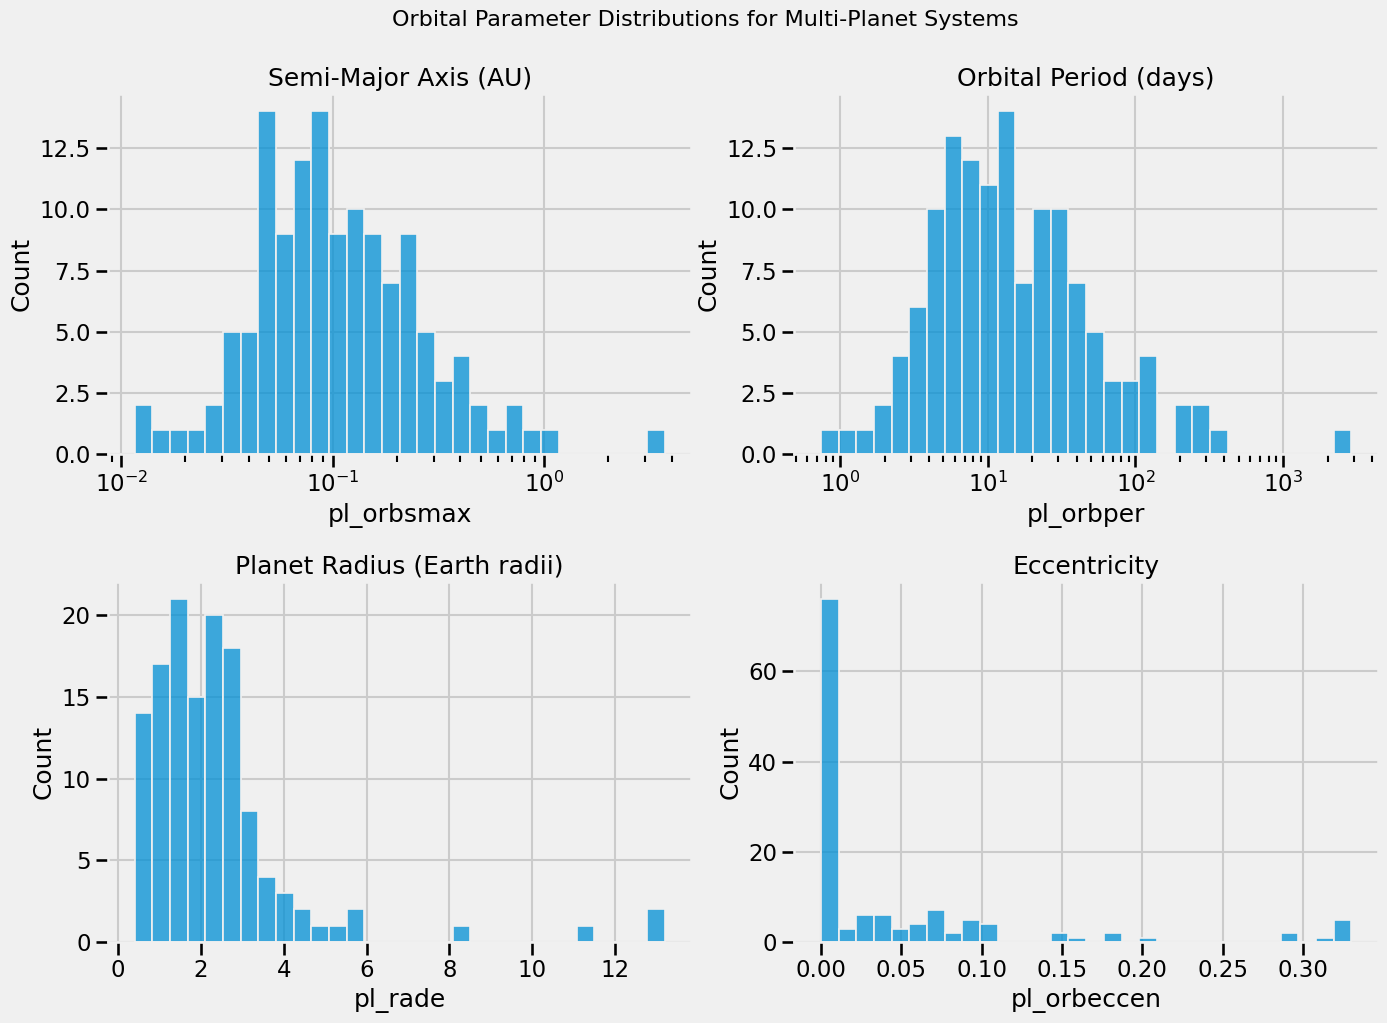

In [63]:
# Count planets per system
system_counts = orbit_df['hostname'].value_counts()
rich_systems = system_counts[system_counts >= 5]
rich_df = orbit_df[orbit_df['hostname'].isin(rich_systems.index)]

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(rich_df['pl_orbsmax'], bins=30, log_scale=True, ax=axes[0, 0])
axes[0, 0].set_title("Semi-Major Axis (AU)")

sns.histplot(rich_df['pl_orbper'], bins=30, log_scale=True, ax=axes[0, 1])
axes[0, 1].set_title("Orbital Period (days)")

sns.histplot(rich_df['pl_rade'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title("Planet Radius (Earth radii)")

sns.histplot(rich_df['pl_orbeccen'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title("Eccentricity")

plt.tight_layout()
fig.suptitle("Orbital Parameter Distributions for Multi-Planet Systems", fontsize=16, y=1.03)
plt.show()

In [77]:
# Create a subset of data with all required orbital parameters
print(f"Complete cases for orbital visualization: {len(orbit_df)} out of {len(df)} total")

Complete cases for orbital visualization: 3966 out of 5903 total


In [64]:
# Count planets per system
system_sizes = orbit_df['hostname'].value_counts()

# Display distribution of system sizes
system_distribution = system_sizes.value_counts().sort_index()
print("Distribution of planets per system:")
for size, count in system_distribution.items():
    print(f"Systems with {size} planet(s): {count}")

Distribution of planets per system:
Systems with 1 planet(s): 2322
Systems with 2 planet(s): 414
Systems with 3 planet(s): 150
Systems with 4 planet(s): 59
Systems with 5 planet(s): 17
Systems with 6 planet(s): 5
Systems with 7 planet(s): 1
Systems with 8 planet(s): 1


In [65]:
# Identify the richest systems for narrative focus
rich_systems = system_sizes[system_sizes >= 5].sort_values(ascending=False)
print("\nTop 5 richest systems (for feature stories):")
for i, (system, count) in enumerate(rich_systems.head(5).items(), 1):
    print(f"{i}. {system}: {count} planets")


Top 5 richest systems (for feature stories):
1. KOI-351: 8 planets
2. TRAPPIST-1: 7 planets
3. Kepler-20: 6 planets
4. TOI-1136: 6 planets
5. Kepler-11: 6 planets


In [66]:
# Summary stats for KOI-351
koi_df = rich_df[rich_df['hostname'] == "KOI-351"].sort_values("pl_orbsmax")
koi_summary = koi_df[['pl_name', 'pl_orbsmax', 'pl_orbper', 'pl_rade', 'pl_orbeccen']]
koi_summary

,pl_name,pl_orbsmax,pl_orbper,pl_rade,pl_orbeccen
2022,KOI-351 b,0.074000,7.008151,1.31,0.0
2023,KOI-351 c,0.089000,8.719375,1.19,0.0
4676,Kepler-90 i,0.120138,14.449120,1.32,0.0
2024,KOI-351 d,0.320000,59.736670,2.87,0.0
2025,KOI-351 e,0.420000,91.939130,2.66,0.0
2026,KOI-351 f,0.480000,124.914400,2.88,0.0
2027,KOI-351 g,0.710000,210.606970,8.10,0.0
2028,KOI-351 h,1.010000,331.600590,11.30,0.0


In [75]:
#koi_df


Planets in KOI-351 system (ordered by distance from star):
1. KOI-351 b: 0.074 AU, Period: 7.0 days, Size: 1.3 Earth radii
2. KOI-351 c: 0.089 AU, Period: 8.7 days, Size: 1.2 Earth radii
3. Kepler-90 i: 0.120 AU, Period: 14.4 days, Size: 1.3 Earth radii
4. KOI-351 d: 0.320 AU, Period: 59.7 days, Size: 2.9 Earth radii
5. KOI-351 e: 0.420 AU, Period: 91.9 days, Size: 2.7 Earth radii
6. KOI-351 f: 0.480 AU, Period: 124.9 days, Size: 2.9 Earth radii
7. KOI-351 g: 0.710 AU, Period: 210.6 days, Size: 8.1 Earth radii
8. KOI-351 h: 1.010 AU, Period: 331.6 days, Size: 11.3 Earth radii


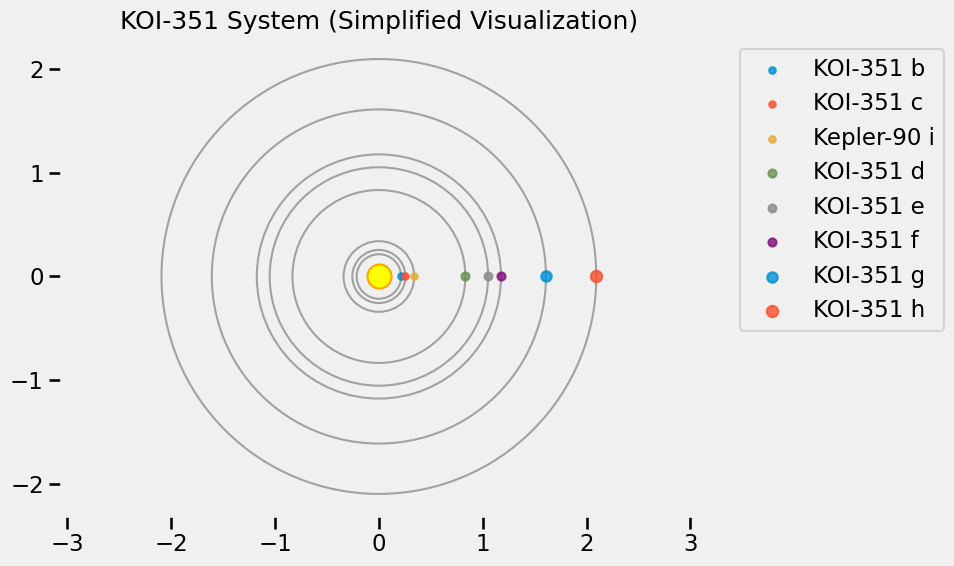

In [76]:
example_system = "KOI-351"
koi_df = rich_df[rich_df['hostname'] == example_system].sort_values("pl_orbsmax")

print(f"\nPlanets in {example_system} system (ordered by distance from star):")
for i, (_, planet) in enumerate(koi_df.iterrows(), 1):
    print(f"{i}. {planet['pl_name']}: {planet['pl_orbsmax']:.3f} AU, "
          f"Period: {planet['pl_orbper']:.1f} days, "
          f"Size: {planet['pl_rade']:.1f} Earth radii")

# === Orbit Visualization ===
plt.figure(figsize=(10, 6))
plt.scatter([0], [0], s=300, color='yellow', edgecolor='orange', zorder=10)  # Star

for _, planet in koi_df.iterrows():
    orbit_radius = np.log1p(planet['pl_orbsmax']) * 3
    planet_size = np.sqrt(planet['pl_rade']) * 20

    # Orbit circle
    circle = plt.Circle((0, 0), orbit_radius, fill=False, linestyle='-', alpha=0.7, color='gray')
    plt.gca().add_patch(circle)

    # Planet
    planet_x = orbit_radius
    planet_y = 0
    plt.scatter([planet_x], [planet_y], s=planet_size, alpha=0.8, label=planet['pl_name'])

plt.title(f"{example_system} System (Simplified Visualization)")
plt.axis('equal')
plt.grid(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Complete cases for orbital visualization: 3966 out of 5903 total


In [78]:
# Analyze distributions of key orbital parameters

# Distribution statistics for semi-major axis
print("Semi-major axis (pl_orbsmax) statistics:")
print(df['pl_orbsmax'].describe())

Semi-major axis (pl_orbsmax) statistics:
count     5612.000000
mean        15.749466
std        355.463372
min          0.004400
25%          0.052623
50%          0.102325
75%          0.300000
max      19000.000000
Name: pl_orbsmax, dtype: float64


In [9]:
# Distribution statistics for orbital period
print("\nOrbital period (pl_orbper) statistics:")
print(df['pl_orbper'].describe())


Orbital period (pl_orbper) statistics:
count    5.610000e+03
mean     7.625650e+04
std      5.369669e+06
min      9.070629e-02
25%      4.389926e+00
50%      1.123569e+01
75%      3.998442e+01
max      4.020000e+08
Name: pl_orbper, dtype: float64


In [11]:
# Distribution statistics for eccentricity
print("\nOrbital eccentricity (pl_orbeccen) statistics:")
print(df['pl_orbeccen'].describe())


Orbital eccentricity (pl_orbeccen) statistics:
count    5044.000000
mean        0.078073
std         0.152335
min         0.000000
25%         0.000000
50%         0.000000
75%         0.090000
max         0.950000
Name: pl_orbeccen, dtype: float64


In [12]:
# Distribution statistics for planet radius
print("\nPlanet radius (pl_rade) statistics:")
print(df['pl_rade'].describe())


Planet radius (pl_rade) statistics:
count    5881.000000
mean        5.747576
std         5.326945
min         0.309800
25%         1.800000
50%         2.809820
75%        11.900000
max        77.342100
Name: pl_rade, dtype: float64


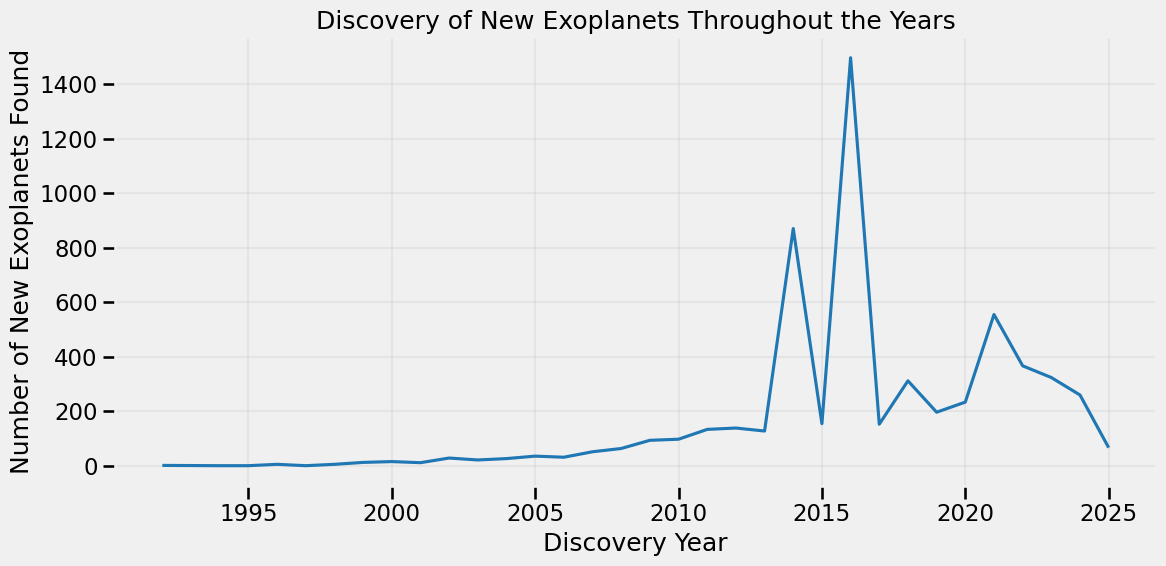

First exoplanet discovery year: 1992
Year with most discoveries: 2016 (1496 planets)
Total exoplanets discovered to date: 5903


In [14]:
# Set plot style
plt.style.use('fivethirtyeight')
sns.set_context("talk")

# Load dataset
#df = pd.read_csv('exoplanet_data.csv')  # Replace with actual path

# Analyze discovery timeline
yearly_discoveries = df.groupby('disc_year').size()

# Plot discoveries over time (matches their page 7 visualization)
plt.figure(figsize=(12, 6))
yearly_discoveries.plot(kind='line', color='#1f77b4')
plt.title('Discovery of New Exoplanets Throughout the Years')
plt.xlabel('Discovery Year')
plt.ylabel('Number of New Exoplanets Found')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print key milestones in discovery
print(f"First exoplanet discovery year: {yearly_discoveries.index.min()}")
print(f"Year with most discoveries: {yearly_discoveries.idxmax()} ({yearly_discoveries.max()} planets)")
print(f"Total exoplanets discovered to date: {len(df)}")

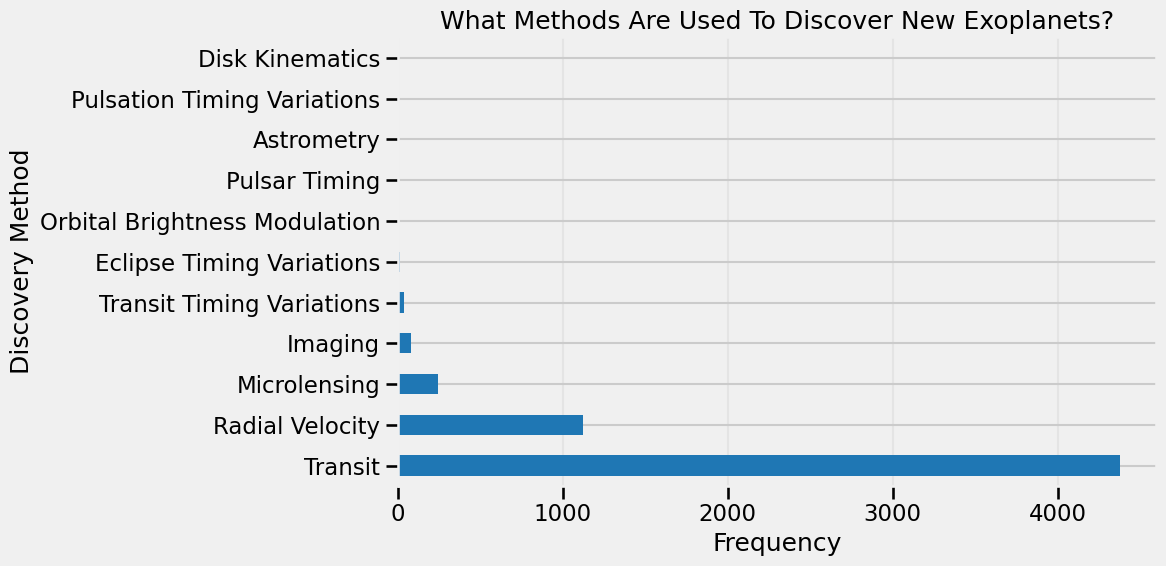

Top 3 discovery methods:
- Transit: 4378 planets (74.2%)
- Radial Velocity: 1121 planets (19.0%)
- Microlensing: 243 planets (4.1%)


In [15]:
# Analyze discovery methods
method_counts = df['discoverymethod'].value_counts()

# Plot methods (similar to their page 9 visualization)
plt.figure(figsize=(12, 6))
method_counts.plot(kind='barh', color='#1f77b4')
plt.title('What Methods Are Used To Discover New Exoplanets?')
plt.xlabel('Frequency')
plt.ylabel('Discovery Method')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("Top 3 discovery methods:")
for method, count in method_counts.head(3).items():
    print(f"- {method}: {count} planets ({count/len(df)*100:.1f}%)")

In [20]:
# Define parameters for Earth-like planets
# Earth: 1 Earth radius, 1 AU from Sun, ~285K temperature
earth_conditions = {
    'radius_min': 0.5,   # Earth radii (rocky planets)
    'radius_max': 1.6,   # Earth radii (upper limit for rocky planets)
    'temp_min': 230,     # Kelvin (cold limit for liquid water)
    'temp_max': 320,     # Kelvin (hot limit for liquid water)
    'orbsmax_min': 0.75, # AU (inner habitable zone)
    'orbsmax_max': 1.5   # AU (outer habitable zone)
}

# Find potentially habitable planets
potentially_habitable = df[
    (df['pl_rade'] >= earth_conditions['radius_min']) & 
    (df['pl_rade'] <= earth_conditions['radius_max']) &
    (df['pl_eqt'] >= earth_conditions['temp_min']) & 
    (df['pl_eqt'] <= earth_conditions['temp_max']) &
    (df['pl_orbsmax'] >= earth_conditions['orbsmax_min']) & 
    (df['pl_orbsmax'] <= earth_conditions['orbsmax_max'])
]

print(f"Potentially habitable planets found: {len(potentially_habitable)}")

# Display details of top 5 most Earth-like planets
if len(potentially_habitable) > 0:
    # Calculate "Earth Similarity Score" - simple version
    potentially_habitable['earth_similarity'] = (
        (1 - abs(potentially_habitable['pl_rade'] - 1) / 1.6) * 0.33 +
        (1 - abs(potentially_habitable['pl_orbsmax'] - 1) / 0.75) * 0.33 +
        (1 - abs(potentially_habitable['pl_eqt'] - 285) / 55) * 0.34
    )
    
    most_earthlike = potentially_habitable.sort_values('earth_similarity', ascending=False)
    
    print("\nTop 5 Most Earth-like planets (for narrative focus):")
    for i, (_, planet) in enumerate(most_earthlike.head(5).iterrows(), 1):
        print(f"{i}. {planet['pl_name']} ({planet['hostname']}):")
        print(f"   - Radius: {planet['pl_rade']:.2f} Earth radii")
        print(f"   - Temperature: {planet['pl_eqt']:.0f} K")
        print(f"   - Distance from star: {planet['pl_orbsmax']:.2f} AU")
        print(f"   - Orbital period: {planet['pl_orbper']:.1f} days")
        print(f"   - Distance from Earth: {planet['sy_dist']:.1f} parsecs")
        print(f"   - Discovery year: {planet['disc_year']}")
        print(f"   - Discovery method: {planet['discoverymethod']}")
        print(f"   - Earth similarity score: {planet['earth_similarity']:.2f}")

Potentially habitable planets found: 0


In [21]:
# Find the extreme planets (for narrative focus)
extremes = {
    'Largest': df.loc[df['pl_rade'].idxmax()],
    'Smallest': df.loc[df['pl_rade'].idxmin()],
    'Hottest': df.loc[df['pl_eqt'].idxmax()],
    'Coldest': df.loc[df[df['pl_eqt'] > 0].pl_eqt.idxmin()],  # Excluding 0K which is likely missing data
    'Closest orbit': df.loc[df['pl_orbsmax'].idxmin()],
    'Furthest orbit': df.loc[df['pl_orbsmax'].idxmax()],
    'Shortest period': df.loc[df['pl_orbper'].idxmin()],
    'Longest period': df.loc[df['pl_orbper'].idxmax()],
    'Most eccentric': df.loc[df['pl_orbeccen'].idxmax()],
    'Most distant from Earth': df.loc[df['sy_dist'].idxmax()]
}

print("Extreme Planets (for narrative focus):")
for category, planet in extremes.items():
    print(f"\n{category}: {planet['pl_name']} ({planet['hostname']})")
    
    # Print relevant extreme value
    if category in ['Largest', 'Smallest']:
        print(f"Radius: {planet['pl_rade']:.2f} Earth radii")
    elif category in ['Hottest', 'Coldest']:
        print(f"Temperature: {planet['pl_eqt']:.0f} K")
    elif category in ['Closest orbit', 'Furthest orbit']:
        print(f"Semi-major axis: {planet['pl_orbsmax']:.5f} AU")
    elif category in ['Shortest period', 'Longest period']:
        print(f"Orbital period: {planet['pl_orbper']:.2f} days")
    elif category == 'Most eccentric':
        print(f"Eccentricity: {planet['pl_orbeccen']:.3f}")
    elif category == 'Most distant from Earth':
        print(f"Distance: {planet['sy_dist']:.1f} parsecs")
        
    # Print discovery info
    print(f"Discovered in {planet['disc_year']} via {planet['discoverymethod']}")

Extreme Planets (for narrative focus):

Largest: HD 100546 b (HD 100546)
Radius: 77.34 Earth radii
Discovered in 2014 via Imaging

Smallest: Kepler-37 b (Kepler-37)
Radius: 0.31 Earth radii
Discovered in 2013 via Transit

Hottest: KELT-9 b (KELT-9)
Temperature: 4050 K
Discovered in 2017 via Transit

Coldest: MOA-2007-BLG-400L b (MOA-2007-BLG-400L)
Temperature: 34 K
Discovered in 2008 via Microlensing

Closest orbit: PSR J1719-1438 b (PSR J1719-1438)
Semi-major axis: 0.00440 AU
Discovered in 2011 via Pulsar Timing

Furthest orbit: UCAC4 328-061594 b (UCAC4 328-061594)
Semi-major axis: 19000.00000 AU
Discovered in 2024 via Imaging

Shortest period: PSR J1719-1438 b (PSR J1719-1438)
Orbital period: 0.09 days
Discovered in 2011 via Pulsar Timing

Longest period: COCONUTS-2 b (COCONUTS-2 A)
Orbital period: 402000000.00 days
Discovered in 2021 via Imaging

Most eccentric: HD 20782 b (HD 20782)
Eccentricity: 0.950
Discovered in 2006 via Radial Velocity

Most distant from Earth: SWEEPS-11 b (S

Key Parameters for Orbit Visualization:

Semi-major axis (AU):
  Range: 0.0044 to 1.9e+04
  Median: 0.102
  Data completeness: 95.1%

Orbital period (days):
  Range: 0.0907 to 4.02e+08
  Median: 11.2
  Data completeness: 95.0%

Eccentricity:
  Range: 0 to 0.95
  Median: 0
  Data completeness: 85.4%

Planet radius (Earth radii):
  Range: 0.31 to 77.3
  Median: 2.81
  Data completeness: 99.6%

Star radius (Solar radii):
  Range: 0.0115 to 109
  Median: 0.952
  Data completeness: 95.3%


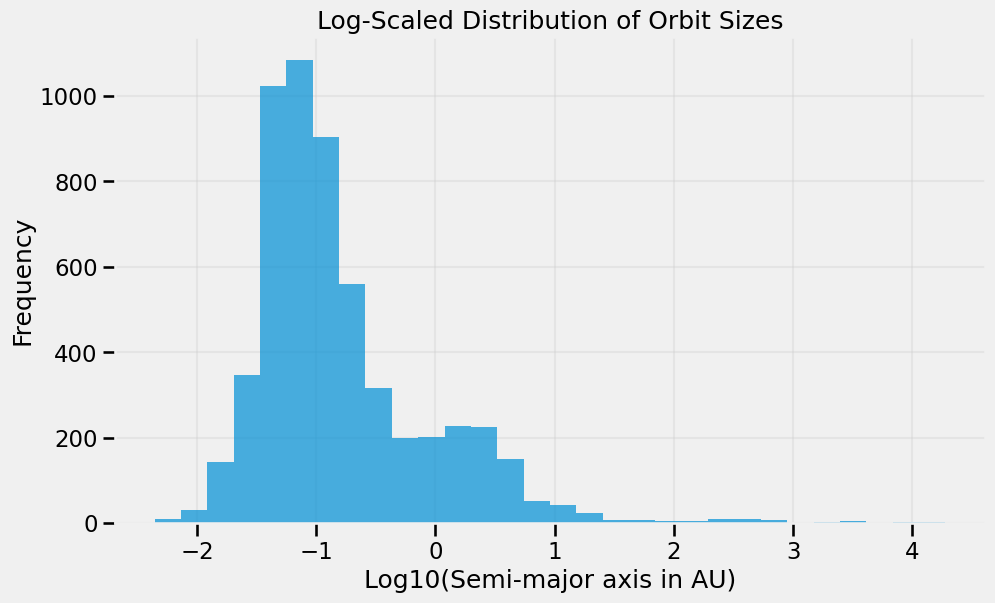


Orbital period range: 0.09 to 402000000.00 days
Log10 ratio of periods: 9.6
Suggested animation scaling: 1 second = 0.5 days
This would make the fastest orbit take 0.2 seconds and the median orbit take 0.9 minutes


In [38]:
# Analyze key parameters for orbit visualization
orbit_params = {
    'Semi-major axis (AU)': df['pl_orbsmax'].describe(),
    'Orbital period (days)': df['pl_orbper'].describe(),
    'Eccentricity': df['pl_orbeccen'].describe(),
    'Planet radius (Earth radii)': df['pl_rade'].describe(),
    'Star radius (Solar radii)': df['st_rad'].describe()
}

print("Key Parameters for Orbit Visualization:")
for param_name, stats in orbit_params.items():
    print(f"\n{param_name}:")
    print(f"  Range: {stats['min']:.3g} to {stats['max']:.3g}")
    print(f"  Median: {stats['50%']:.3g}")
    print(f"  Data completeness: {stats['count']/len(df)*100:.1f}%")

# Assess proper scaling relationships for visualization
# Visual orbit size = f(semi-major axis)
# Visual planet size = f(planet radius)
# Animation speed = f(orbital period)

# Create log scaling examples
orbits_log_scale = np.log10(np.maximum(df['pl_orbsmax'].dropna(), 0.001))  # Avoid log(0)

plt.figure(figsize=(10, 6))
plt.hist(orbits_log_scale, bins=30, alpha=0.7)
plt.title('Log-Scaled Distribution of Orbit Sizes')
plt.xlabel('Log10(Semi-major axis in AU)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate animation time scaling
# Goal: Make the fastest orbital period visible but keep reasonable animation time
min_period = df['pl_orbper'].min()
max_period = df['pl_orbper'].max()
print(f"\nOrbital period range: {min_period:.2f} to {max_period:.2f} days")
print(f"Log10 ratio of periods: {np.log10(max_period/min_period):.1f}")
print(f"Suggested animation scaling: 1 second = {min_period*5:.1f} days")
print(f"This would make the fastest orbit take 0.2 seconds and the median orbit take {df['pl_orbper'].median()*5/60:.1f} minutes")

In [24]:
# Analyze discovery methods for rich planetary systems
rich_systems = df[df['hostname'].isin(['KOI-351', 'TRAPPIST-1', 'HD 191939', 'HD 10180', 'K2-138'])]
discovery_methods = rich_systems.groupby(['hostname', 'discoverymethod']).size().unstack()

print("Discovery methods for featured systems:")
print(discovery_methods)

# How were most multi-planet systems discovered?
multi_planet_systems = df.groupby('hostname').filter(lambda x: len(x) > 1)
multi_discovery = multi_planet_systems['discoverymethod'].value_counts()

print("\nTop discovery methods for multi-planet systems:")
for method, count in multi_discovery.head(3).items():
    print(f"- {method}: {count} planets")

Discovery methods for featured systems:
discoverymethod  Radial Velocity  Transit
hostname                                 
HD 10180                     6.0      NaN
HD 191939                    3.0      3.0
K2-138                       NaN      6.0
KOI-351                      NaN      8.0
TRAPPIST-1                   NaN      7.0

Top discovery methods for multi-planet systems:
- Transit: 1830 planets
- Radial Velocity: 571 planets
- Transit Timing Variations: 35 planets


In [25]:
# Define a simple habitable zone calculation based on star type and distance
def in_habitable_zone(row):
    # Simplified calculation based on star temperature
    if pd.isnull(row['st_teff']) or pd.isnull(row['pl_orbsmax']):
        return False
    
    # Approximate habitable zone boundaries based on star temperature
    # This is a simplified model
    star_temp = row['st_teff']
    
    # Warmer stars have more distant habitable zones
    if star_temp > 7000:  # F-type and hotter
        inner_edge = 1.3
        outer_edge = 2.5
    elif star_temp > 5200:  # G-type (Sun-like)
        inner_edge = 0.95
        outer_edge = 1.7
    elif star_temp > 3700:  # K-type
        inner_edge = 0.6
        outer_edge = 1.2
    else:  # M-type (cool stars)
        inner_edge = 0.1
        outer_edge = 0.4
    
    return inner_edge <= row['pl_orbsmax'] <= outer_edge

# Apply the function to the dataset
df['in_habitable_zone'] = df.apply(in_habitable_zone, axis=1)

# Count potentially habitable planets
habitable_count = df['in_habitable_zone'].sum()
print(f"Potentially habitable planets: {habitable_count} ({habitable_count/len(df)*100:.1f}%)")

# List of habitable planets in rich systems
habitable_in_rich = df[(df['in_habitable_zone']) & 
                       (df['hostname'].isin(['KOI-351', 'TRAPPIST-1', 'HD 191939', 'HD 10180', 'K2-138']))]

print("\nPotentially habitable planets in featured systems:")
for _, planet in habitable_in_rich.iterrows():
    print(f"- {planet['pl_name']} ({planet['hostname']}): {planet['pl_orbsmax']:.2f} AU, {planet['pl_eqt']:.0f} K")

Potentially habitable planets: 225 (3.8%)

Potentially habitable planets in featured systems:
- HD 10180 g (HD 10180): 1.43 AU, nan K
- KOI-351 h (KOI-351): 1.01 AU, 294 K


In [26]:
# Define planet size categories
def planet_category(radius):
    if radius < 0.5:
        return "Sub-Earth"
    elif radius < 1.6:
        return "Earth-like"
    elif radius < 4:
        return "Super-Earth/Mini-Neptune"
    elif radius < 15:
        return "Neptune-like"
    else:
        return "Jupiter-like or larger"

# Add category to dataset
df['planet_category'] = df['pl_rade'].apply(planet_category)

# Count by category
category_counts = df['planet_category'].value_counts().sort_index()
print("Planet size categories:")
for category, count in category_counts.items():
    print(f"- {category}: {count} planets ({count/len(df)*100:.1f}%)")

# Create a visualization-friendly breakdown for featured systems
featured_systems = ['KOI-351', 'TRAPPIST-1', 'HD 191939', 'HD 10180', 'K2-138']
system_categories = df[df['hostname'].isin(featured_systems)].groupby(['hostname', 'planet_category']).size().unstack()

print("\nPlanet size distribution in featured systems:")
print(system_categories.fillna(0).astype(int))

Planet size categories:
- Earth-like: 1138 planets (19.3%)
- Jupiter-like or larger: 239 planets (4.0%)
- Neptune-like: 2000 planets (33.9%)
- Sub-Earth: 8 planets (0.1%)
- Super-Earth/Mini-Neptune: 2518 planets (42.7%)

Planet size distribution in featured systems:
planet_category  Earth-like  Neptune-like  Super-Earth/Mini-Neptune
hostname                                                           
HD 10180                  0             4                         2
HD 191939                 0             2                         4
K2-138                    1             0                         5
KOI-351                   3             2                         3
TRAPPIST-1                7             0                         0


In [27]:
# Detect potential orbital resonances in multi-planet systems
# Orbital resonance = simple ratio between orbital periods of adjacent planets

def check_resonance(periods):
    """Check for potential resonances between adjacent periods"""
    periods = sorted(periods)
    resonances = []
    
    for i in range(len(periods)-1):
        ratio = periods[i+1] / periods[i]
        
        # Check common resonances (with some tolerance)
        for num, denom in [(3,2), (2,1), (5,3), (3,1), (4,3), (5,2)]:
            expected = num/denom
            if abs(ratio - expected) < 0.05:  # 5% tolerance
                resonances.append(f"{num}:{denom}")
                break
    
    return resonances

# Apply to rich systems
rich_systems_list = ['KOI-351', 'TRAPPIST-1', 'HD 191939', 'HD 10180', 'K2-138']
for system in rich_systems_list:
    system_planets = df[df['hostname'] == system]
    periods = system_planets['pl_orbper'].dropna().values
    resonances = check_resonance(periods)
    
    if resonances:
        print(f"{system} shows potential orbital resonances: {', '.join(resonances)}")
        print(f"  Orbital periods: {', '.join([f'{p:.1f}' for p in sorted(periods)])}")

KOI-351 shows potential orbital resonances: 5:3, 3:2, 4:3, 5:3
  Orbital periods: 7.0, 8.7, 14.4, 59.7, 91.9, 124.9, 210.6, 331.6
TRAPPIST-1 shows potential orbital resonances: 5:3, 3:2, 3:2, 4:3, 3:2
  Orbital periods: 1.5, 2.4, 4.0, 6.1, 9.2, 12.4, 18.8
HD 191939 shows potential orbital resonances: 4:3
  Orbital periods: 8.9, 28.6, 38.4, 101.1, 284.0, 2898.0
HD 10180 shows potential orbital resonances: 3:1, 5:2
  Orbital periods: 5.8, 16.4, 49.7, 122.7, 604.7, 2205.0
K2-138 shows potential orbital resonances: 3:2, 3:2, 3:2, 3:2
  Orbital periods: 2.4, 3.6, 5.4, 8.3, 12.8, 42.0


In [28]:
# Calculate optimal animation speeds for different systems
def animation_parameters(system_name):
    """Calculate animation parameters for the system"""
    system_planets = df[df['hostname'] == system_name]
    
    if len(system_planets) == 0:
        return None
    
    min_period = system_planets['pl_orbper'].min()
    max_period = system_planets['pl_orbper'].max()
    
    # For comfortable viewing:
    # - Fastest planet should complete orbit in ~5 seconds
    # - Animation should be engaging to watch for ~30 seconds
    speed_factor = min_period / 5  # days per second
    
    return {
        'min_period': min_period,
        'max_period': max_period,
        'period_ratio': max_period / min_period,
        'suggested_speed': speed_factor,
        'full_cycle_time': max_period / speed_factor  # seconds to see all planets complete orbit
    }

# Calculate for featured systems
for system in rich_systems_list:
    params = animation_parameters(system)
    if params:
        print(f"\n{system} animation parameters:")
        print(f"  Period range: {params['min_period']:.1f} to {params['max_period']:.1f} days")
        print(f"  Period ratio: {params['period_ratio']:.1f}x")
        print(f"  Suggested speed: 1 second = {params['suggested_speed']:.1f} days")
        print(f"  Full cycle time: {params['full_cycle_time']:.1f} seconds")
        
        # Animation feasibility assessment
        if params['full_cycle_time'] < 60:
            print("  ✓ Good for direct animation")
        elif params['full_cycle_time'] < 300:
            print("  ✓ Suitable with speed controls")
        else:
            print("  ⚠ Needs time acceleration options")


KOI-351 animation parameters:
  Period range: 7.0 to 331.6 days
  Period ratio: 47.3x
  Suggested speed: 1 second = 1.4 days
  Full cycle time: 236.6 seconds
  ✓ Suitable with speed controls

TRAPPIST-1 animation parameters:
  Period range: 1.5 to 18.8 days
  Period ratio: 12.4x
  Suggested speed: 1 second = 0.3 days
  Full cycle time: 62.1 seconds
  ✓ Suitable with speed controls

HD 191939 animation parameters:
  Period range: 8.9 to 2898.0 days
  Period ratio: 326.3x
  Suggested speed: 1 second = 1.8 days
  Full cycle time: 1631.7 seconds
  ⚠ Needs time acceleration options

HD 10180 animation parameters:
  Period range: 5.8 to 2205.0 days
  Period ratio: 382.8x
  Suggested speed: 1 second = 1.2 days
  Full cycle time: 1914.2 seconds
  ⚠ Needs time acceleration options

K2-138 animation parameters:
  Period range: 2.4 to 42.0 days
  Period ratio: 17.8x
  Suggested speed: 1 second = 0.5 days
  Full cycle time: 89.2 seconds
  ✓ Suitable with speed controls


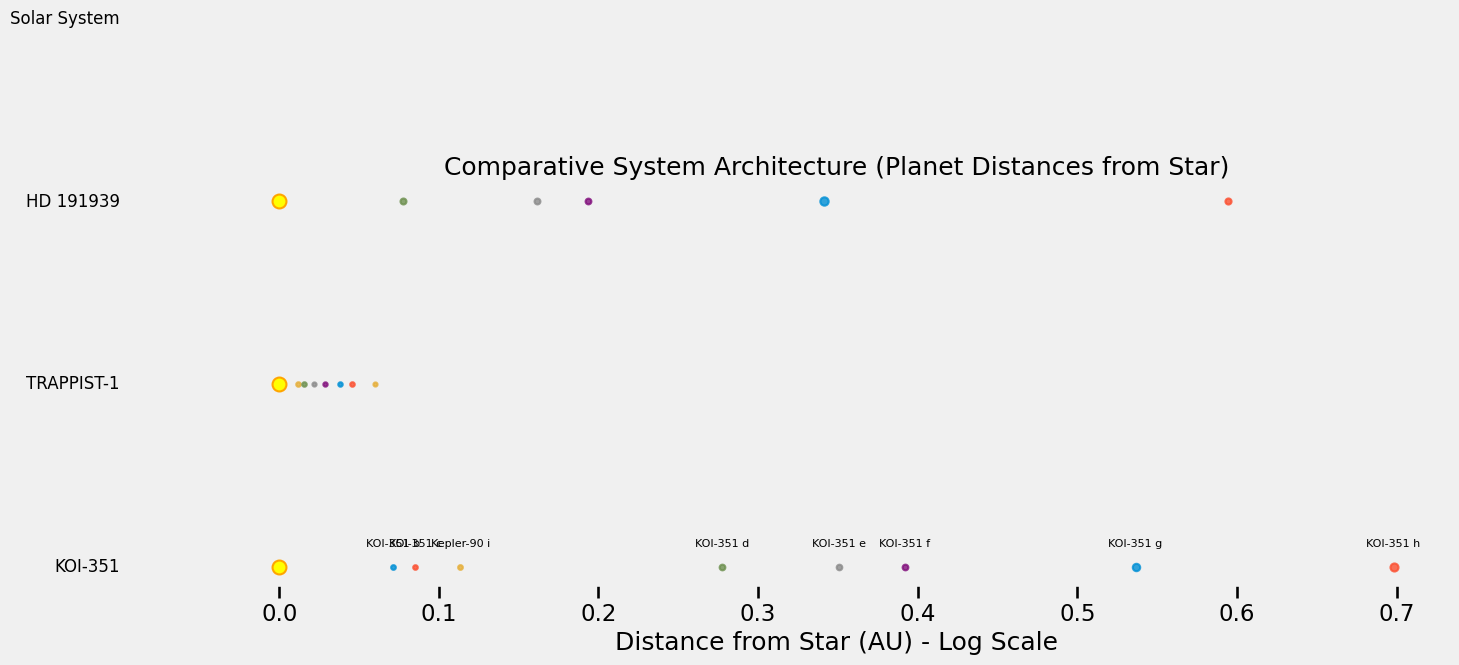

In [29]:
# Create a comparative visualization of multiple rich systems
def plot_system_architecture(systems, max_distance=2.0, log_scale=True):
    """Plot comparative system architecture"""
    plt.figure(figsize=(15, 8))
    
    for i, system in enumerate(systems):
        system_planets = df[df['hostname'] == system].sort_values('pl_orbsmax')
        
        if len(system_planets) == 0:
            continue
            
        y_pos = i
        
        # Plot star
        plt.scatter([0], [y_pos], s=100, color='yellow', edgecolor='orange', zorder=10)
        
        # Plot planets
        for _, planet in system_planets.iterrows():
            distance = planet['pl_orbsmax']
            
            # Skip planets beyond visualization range
            if distance > max_distance:
                continue
                
            # Apply log scaling if requested
            x_pos = np.log1p(distance) if log_scale else distance
            size = np.sqrt(planet['pl_rade']) * 10
            
            plt.scatter([x_pos], [y_pos], s=size, 
                       alpha=0.8, label=planet['pl_name'] if i == 0 else "")
            
            # Add mini-label for first system
            if i == 0:
                plt.text(x_pos, y_pos+0.1, planet['pl_name'], 
                        ha='center', va='bottom', fontsize=8)
    
    # Add system names
    for i, system in enumerate(systems):
        plt.text(-0.1, i, system, ha='right', va='center', fontsize=12)
        
    # Set plot properties
    plt.title('Comparative System Architecture (Planet Distances from Star)')
    plt.xlabel('Distance from Star (AU)' + ' - Log Scale' if log_scale else '')
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Plot our featured systems
plot_system_architecture(['KOI-351', 'TRAPPIST-1', 'HD 191939', 'Solar System'], 
                        max_distance=2.0, log_scale=True)

In [30]:
# Analyze missingness patterns in key orbit visualization columns
viz_columns = ['pl_orbsmax', 'pl_orbper', 'pl_orbeccen', 'pl_rade', 'st_rad']
missingness = df[viz_columns].isnull().sum()
missingness_percent = missingness / len(df) * 100

print("Data completeness for visualization parameters:")
for col, missing in missingness.items():
    print(f"- {col}: {len(df)-missing}/{len(df)} complete ({100-missingness_percent[col]:.1f}%)")

# Check systems with incomplete data
for system in rich_systems_list:
    system_data = df[df['hostname'] == system][viz_columns]
    missing_count = system_data.isnull().sum().sum()
    
    if missing_count > 0:
        print(f"\n{system} has {missing_count} missing values:")
        print(system_data.isnull().sum())

Data completeness for visualization parameters:
- pl_orbsmax: 5612/5903 complete (95.1%)
- pl_orbper: 5610/5903 complete (95.0%)
- pl_orbeccen: 5044/5903 complete (85.4%)
- pl_rade: 5881/5903 complete (99.6%)
- st_rad: 5624/5903 complete (95.3%)


In [31]:
# Add Earth similarity metrics
def earth_distance_metric(row):
    """Calculate a simple Earth similarity metric for visualization"""
    # Weight factors based on importance for habitability
    weights = {
        'size': 0.3,      # Planet size
        'orbit': 0.4,     # Orbital distance
        'temp': 0.3       # Temperature
    }
    
    # Skip if missing key data
    if pd.isnull(row['pl_rade']) or pd.isnull(row['pl_orbsmax']) or pd.isnull(row['pl_eqt']):
        return None
    
    # Calculate component similarities (1 = identical to Earth, 0 = completely different)
    size_sim = max(0, 1 - abs(row['pl_rade'] - 1) / 5)
    orbit_sim = max(0, 1 - abs(row['pl_orbsmax'] - 1) / 2)
    temp_sim = max(0, 1 - abs((row['pl_eqt'] - 285) / 200))
    
    # Weighted combination
    return (size_sim * weights['size'] + 
            orbit_sim * weights['orbit'] + 
            temp_sim * weights['temp'])

# Add to dataset
df['earth_similarity'] = df.apply(earth_distance_metric, axis=1)

# Find most Earth-like planets
most_earthlike = df.dropna(subset=['earth_similarity']).sort_values('earth_similarity', ascending=False).head(10)

print("Most Earth-like planets (for highlighting in visualization):")
for i, (_, planet) in enumerate(most_earthlike.iterrows(), 1):
    print(f"{i}. {planet['pl_name']} ({planet['hostname']}):")
    print(f"   - Similarity score: {planet['earth_similarity']:.2f}")
    print(f"   - Size: {planet['pl_rade']:.2f} Earth radii")
    print(f"   - Orbit: {planet['pl_orbsmax']:.2f} AU")
    print(f"   - Temperature: {planet['pl_eqt']:.0f} K")

Most Earth-like planets (for highlighting in visualization):
1. Kepler-452 b (Kepler-452):
   - Similarity score: 0.92
   - Size: 1.63 Earth radii
   - Orbit: 1.05 AU
   - Temperature: 265 K
2. Kepler-22 b (Kepler-22):
   - Similarity score: 0.89
   - Size: 2.10 Earth radii
   - Orbit: 0.81 AU
   - Temperature: 279 K
3. Kepler-289 e (Kepler-289):
   - Similarity score: 0.87
   - Size: 2.94 Earth radii
   - Orbit: 0.93 AU
   - Temperature: 286 K
4. Kepler-1638 b (Kepler-1638):
   - Similarity score: 0.87
   - Size: 1.87 Earth radii
   - Orbit: 0.74 AU
   - Temperature: 304 K
5. Kepler-1126 c (Kepler-1126):
   - Similarity score: 0.87
   - Size: 1.45 Earth radii
   - Orbit: 0.62 AU
   - Temperature: 305 K
6. Kepler-69 c (Kepler-69):
   - Similarity score: 0.86
   - Size: 1.71 Earth radii
   - Orbit: 0.64 AU
   - Temperature: 299 K
7. Kepler-1634 b (Kepler-1634):
   - Similarity score: 0.85
   - Size: 3.19 Earth radii
   - Orbit: 1.05 AU
   - Temperature: 282 K
8. Kepler-1040 b (Kepler-10

In [32]:
# Analyze relationships between parameters to determine best visual encodings
correlations = df[['pl_rade', 'pl_orbsmax', 'pl_orbper', 'pl_orbeccen', 'pl_eqt']].corr()

print("Parameter correlations (for visual encoding decisions):")
print(correlations)

# Recommend visual encodings based on data characteristics
print("\nRecommended visual encodings for D3.js implementation:")
print("1. Orbit size: Based on semi-major axis (pl_orbsmax) with logarithmic scale")
print("2. Planet size: Based on planet radius (pl_rade) with square root scale")
print("3. Planet color: Based on equilibrium temperature (pl_eqt)")
print("4. Orbit shape: Based on eccentricity (pl_orbeccen)")
print("5. Animation speed: Based on orbital period (pl_orbper) with time controls")

Parameter correlations (for visual encoding decisions):
              pl_rade  pl_orbsmax  pl_orbper  pl_orbeccen    pl_eqt
pl_rade      1.000000    0.055962   0.019741     0.395099  0.432624
pl_orbsmax   0.055962    1.000000   0.996748     0.157622  0.066309
pl_orbper    0.019741    0.996748   1.000000     0.070649 -0.014226
pl_orbeccen  0.395099    0.157622   0.070649     1.000000 -0.042563
pl_eqt       0.432624    0.066309  -0.014226    -0.042563  1.000000

Recommended visual encodings for D3.js implementation:
1. Orbit size: Based on semi-major axis (pl_orbsmax) with logarithmic scale
2. Planet size: Based on planet radius (pl_rade) with square root scale
3. Planet color: Based on equilibrium temperature (pl_eqt)
4. Orbit shape: Based on eccentricity (pl_orbeccen)
5. Animation speed: Based on orbital period (pl_orbper) with time controls
